## 1. 线型图
Series和DataFrame都自带生成图表的`plot()`方法，默认生成线型图  
`plot()` 返回一个subplot对象
- `ax`：指定在哪个subplot对象上绘图，不指定的话使用当前subplot或新建subplot
- `style`：线型颜色等，如'ko--'
- `alpha`：不透明度，0~1
- `kind`：图形类型
    - 'line'：线型图，默认，相当于`plot.line()`
    - 'bar'：柱状图-竖，相当于`plot.bar()`
    - 'barh'：柱状图-横，相当于`plot.barh()`
    - 'kde'：曲线图，相当于`plot.kde()`
- `use_index`：布尔值，使用对象索引作为刻度，默认True，Series的索引用来绘制X轴
- `xlim`：X轴范围，如[0,10]
- `xticks`：X轴刻度值
- `label`：图例标签
![title](img/pandas-plot.png)
![title](img/pandas-plot-1.png)

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 10行4列数据，即4条线每条线10个数据点
data = pd.DataFrame(np.random.randint(10, size=40).reshape(
    10, 4).cumsum(0), columns=list('ABCD'))

<IPython.core.display.Javascript object>


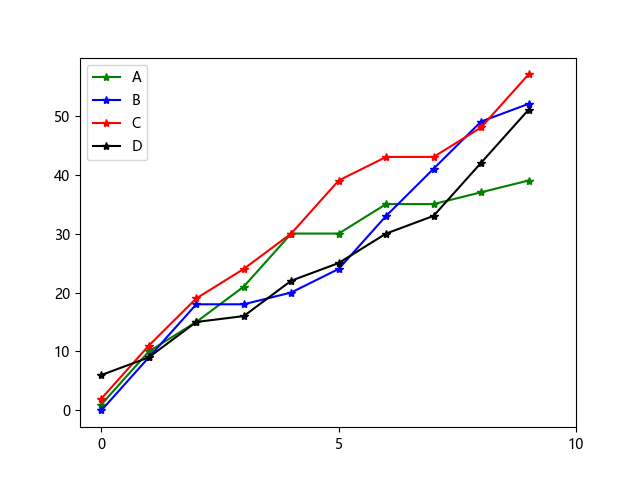

In [3]:
# 设置X轴刻度值，每条线单独设置线型和颜色，kind默认是'line'可以不写
data.plot(xticks=[0, 5, 10], style=[
               'g*-', 'b*-', 'r*-', 'k*-'], kind='line')

## 2. 柱状图
`plot.bar()` 绘制垂直柱状图
- Series的索引被用作X刻度
- DataFrame每行做为一组，并排显示，index作为X刻度，columns作为Y刻度，columns的name属性为图例的标题

`plot.barh()` 绘制水平垂直图，索引对应的刻度与`plot.bar()`相反，用法相同

<IPython.core.display.Javascript object>


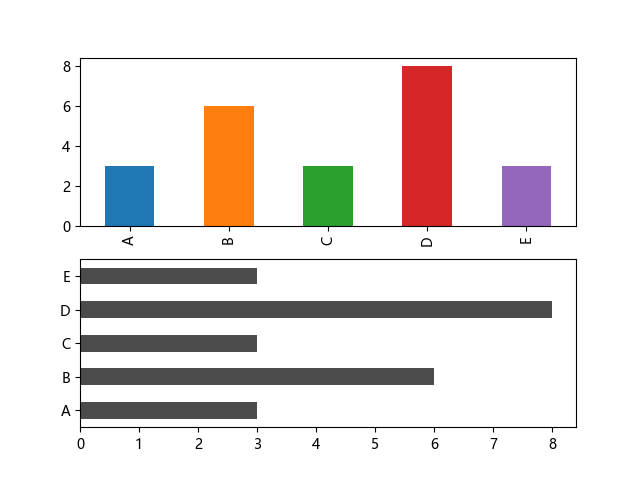

In [4]:
fig,axes=plt.subplots(2,1) # 建立2个subplot
data=pd.Series(np.random.randint(10,size=5),index=list('ABCDE'))
data.plot.bar(ax=axes[0]) # 第一个subplot绘制垂直柱状图
data.plot.barh(ax=axes[1],color='k',alpha=0.7) # 第二个subplot绘制水平柱状图，并设置黑色，70%透明度

<IPython.core.display.Javascript object>


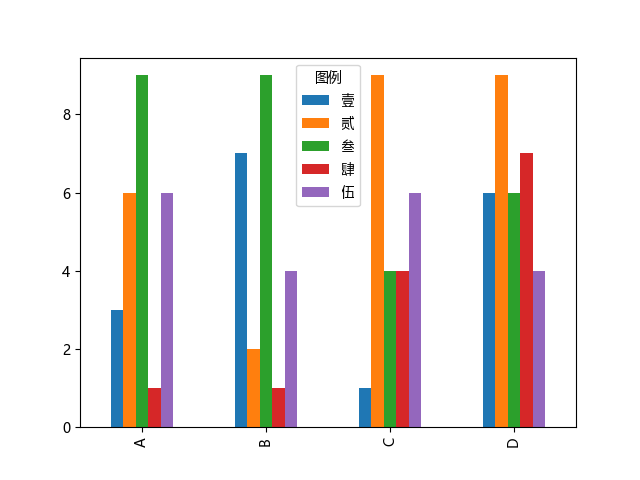

In [5]:
# 使用DataFrame绘制柱状图，columns的name属性作为图例标题
df = pd.DataFrame(np.random.randint(1, 10, size=20).reshape(
    4, 5), index=list('ABCD'), columns=pd.Index(list('壹贰叁肆伍'), name='图例'))
df.plot.bar()

<IPython.core.display.Javascript object>


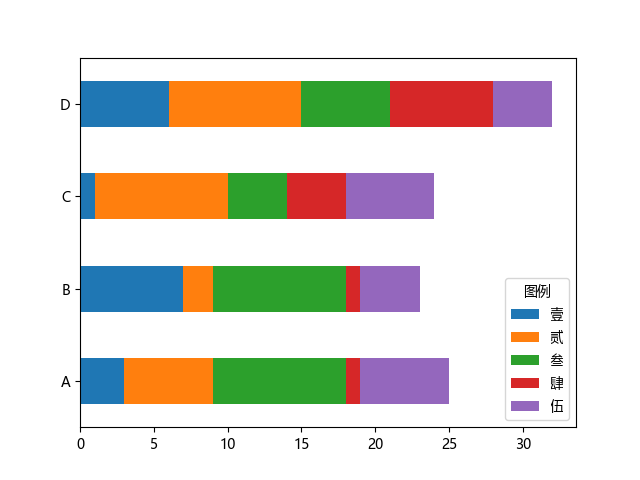

In [6]:
# 绘制水平堆积柱状图
df.plot.barh(stacked=True)

In [7]:
users=pd.Index(['User-'+str(x) for x in range(1,6)],name='Users')

In [8]:
scores=pd.DataFrame(np.random.randint(60,100,size=20).reshape(4,5),index=pd.Index(list('ABCD'),name='Items'),columns=users)
scores

Users,User-1,User-2,User-3,User-4,User-5
Items,,,,,
A,82,75,63,63,60
B,92,83,70,94,75
C,72,92,90,74,61
D,77,76,62,62,60


In [9]:
scores_avg=scores.div(scores.sum(1),axis=0).round(2)
scores_avg

Users,User-1,User-2,User-3,User-4,User-5
Items,,,,,
A,0.24,0.22,0.18,0.18,0.17
B,0.22,0.20,0.17,0.23,0.18
C,0.19,0.24,0.23,0.19,0.16
D,0.23,0.23,0.18,0.18,0.18


<IPython.core.display.Javascript object>


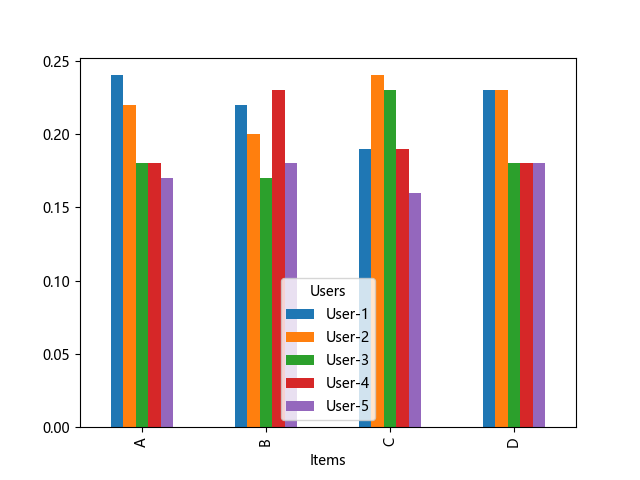

In [10]:
scores_avg.plot.bar()

In [11]:
s=scores.melt()

In [12]:
s

,Users,value
0,User-1,82
1,User-1,92
2,User-1,72
3,User-1,77
4,User-2,75
5,User-2,83
6,User-2,92
7,User-2,76
8,User-3,63
9,User-3,70


In [13]:
import seaborn as sns

<IPython.core.display.Javascript object>


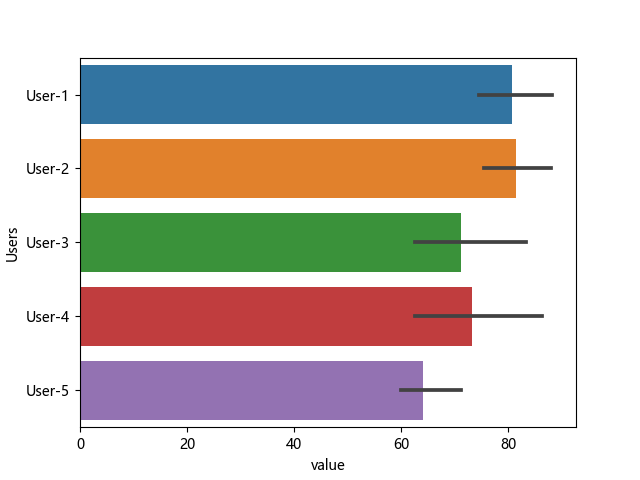

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [14]:
plt.figure().add_subplot(111)
sns.barplot(x='value',y='Users',data=s,orient='h')
#sns.barplot(x=tuple(s['value']),y='Users',data=s,orient='h')